In [1]:
%run MakeDataset.py

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [2]:
from MakeDataset import X_train,y_train

print(X_train)
print(y_train)

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
[[[ 1.19648    -0.1606898  -0.740178  ]
  [ 1.22203    -0.2672951  -0.7717485 ]
  [ 1.22311    -0.4338634  -0.7678422 ]
  ...
  [ 0.4974957  -0.2795907  -0.2029592 ]
  [ 0.5064167  -0.286091   -0.2564634 ]
  [ 0.5609918  -0.302237   -0.2553743 ]]

 [[ 0.253887    0.6446213   0.7305601 ]
  [ 0.2547409   0.6470096   0.7330282 ]
  [ 0.256914    0.6468081   0.7354798 ]
  ...
  [ 0.2489302   0.642803    0.7323693 ]
  [ 0.2503708   0.6447095   0.7369245 ]
  [ 0.2513104   0.6440663   0.735841  ]]

 [[ 0.9736077  -0.1844755  -0.2821974 ]
  [ 0.9760866  -0.1867793  -0.2848794 ]
  [ 0.977865   -0.191836   -0.2891687 ]
  ...
  [ 0.9779202  -0.1834941  -0.2829651 ]
  [ 0.9796224  -0.1832831  -0.279844  ]
  [ 0.9775468  -0.1833646  -0.2764387 ]]

 ...

 [[ 0.1943966   0.5317094   0.834933  ]
  [ 0.1938159   0.5319046   0.8337903 ]
  [ 0.1907567   0.5332984   0.8291312 ]
  ...
  [ 0.188955    0.5606699   0.8099954 ]
  [ 0.186853  

## Import Libraries

In [3]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import tsfel

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

In [6]:
activity_labels = {
    1: "WALKING",
    2: "WALKING UPSTAIRS",
    3: "WALKING DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

## Q1

Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

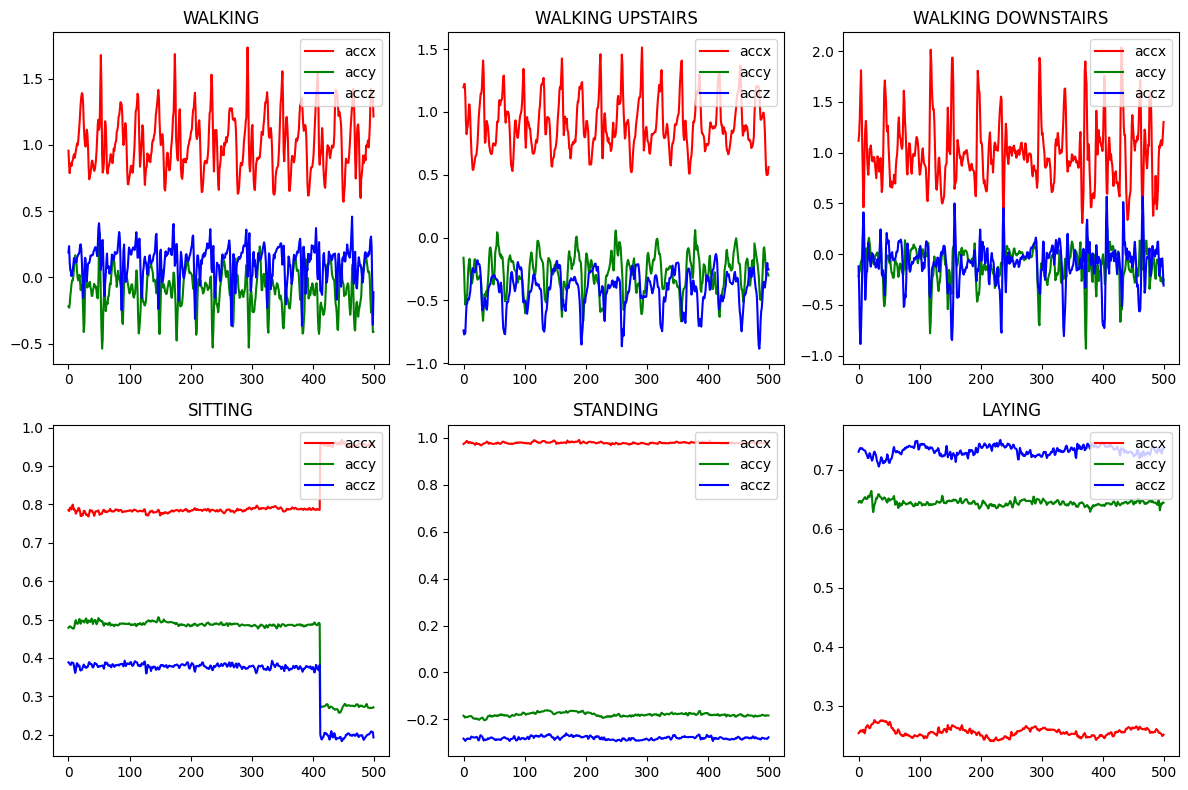

In [7]:
activity_classes = np.unique(y_train)

color_accx = 'red'
color_accy = 'green'
color_accz = 'blue'

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, index in enumerate(activity_classes):
    waveform = X_train[y_train == index][0]
    row = i // 3
    col = i % 3
    axes[row, col].plot(waveform[:, 0], label='accx', color=color_accx)
    axes[row, col].plot(waveform[:, 1], label='accy', color=color_accy)
    axes[row, col].plot(waveform[:, 2], label='accz', color=color_accz)
    axes[row, col].set_title(activity_labels[index])
    axes[row, col].legend(loc='upper right') 

plt.tight_layout()
plt.show()

Based on the data we can see that the plots obtained for Static Activities i.e Laying, Standing, and Sitting is visibly different as compared to Dynamic Activities i.e Walking, Walking Upstairs, and Walking Downstairs.


While comparing Static activities we observe that $acc_y$ for Laying is differnent than the others and can be a major factor for classifying an activity as laying. As for comparing, Sitting and Standing we can see some overlaps hence the learning could give wrong results while classifying between the two. While Standing some axis are negative and might be a factor to consider.


The plots for Dynamic activities are visibly quite similar, and can also be dependent on the person in consideration. Hence, intutively it seems as these classes will have significant overlap and significantly poor learing as compared to the Static activities. 

## Q2

Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration 
$
(acc_x)^2 + (acc_y)^2 + (acc_z)^2
$
 for each activity and justify your answer.

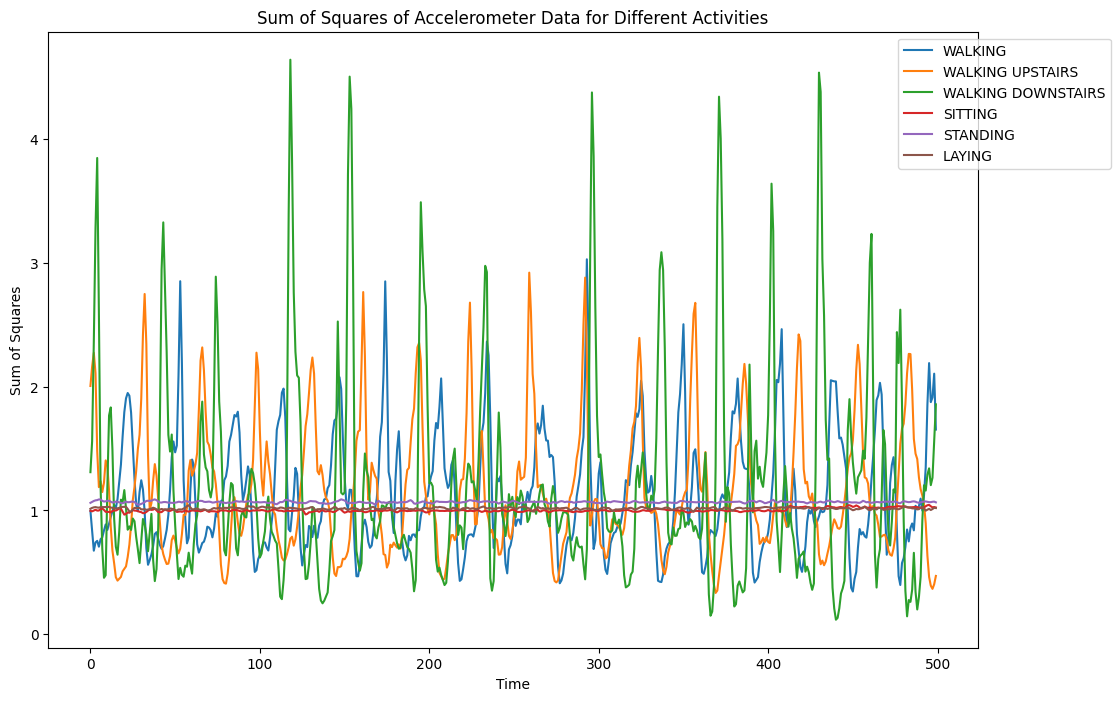

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

for i, index in enumerate(activity_classes):
    waveform = X_train[y_train == index][0]

    sum_of_squares = np.sum(waveform**2, axis=1)

    ax.plot(sum_of_squares, label=activity_labels[index])

ax.set_title('Sum of Squares of Accelerometer Data for Different Activities')
ax.set_xlabel('Time')
ax.set_ylabel('Sum of Squares')

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))

plt.show()

The linear acceleration 
$
(acc_x)^2 + (acc_y)^2 + (acc_z)^2 
$
for Static activities is visibly different than the Static activities. As can be obsereved in the plot, Dynamic activities have significantly large total acceleration as compared to Static Activities.


Hence it is possible to seperate Static activities from Dynamic activities using a ML model.

# TSFEL Feature Extraction

In [9]:
X_train_total_acc = np.sum(X_train**2, axis=2)
print(X_train_total_acc.shape)

(126, 500)


In [10]:
cfg = tsfel.get_features_by_domain()
# X_tsfel = tsfel.time_series_features_extractor(cfg, X_train, fs=50)
X_tsfel = []
feature_names = []
for i in range(X_train_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_train_total_acc[i], fs=50)
    X_tsfel.append(X_tsf.values)
    if feature_names == []:
        feature_names = X_tsf.columns.tolist()
X_tsfel = np.vstack(X_tsfel)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [11]:
X_tsfel_df = pd.DataFrame(X_tsfel, columns=feature_names)
corr_features = tsfel.correlated_features(X_tsfel_df)
X_tsfel_df.drop(corr_features, axis=1, inplace=True)

In [12]:
selector = VarianceThreshold()
X_tsfel_df_var = selector.fit_transform(X_tsfel_df)

In [13]:
kbest_selector = SelectKBest(score_func=f_classif, k=10)
X_tsfel_df_k = kbest_selector.fit_transform(X_tsfel_df_var, y_train)

In [14]:
scaler = StandardScaler()
nX_train = scaler.fit_transform(X_tsfel_df_k)

In [15]:
print(nX_train.shape)

(126, 10)


## Q3

### Visualize the data using PCA

1. Use PCA (Principal Component Analysis) on Total Acceleration 
$
(acc_x)^2 + (acc_y)^2 + (acc_z)^2
$
 to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

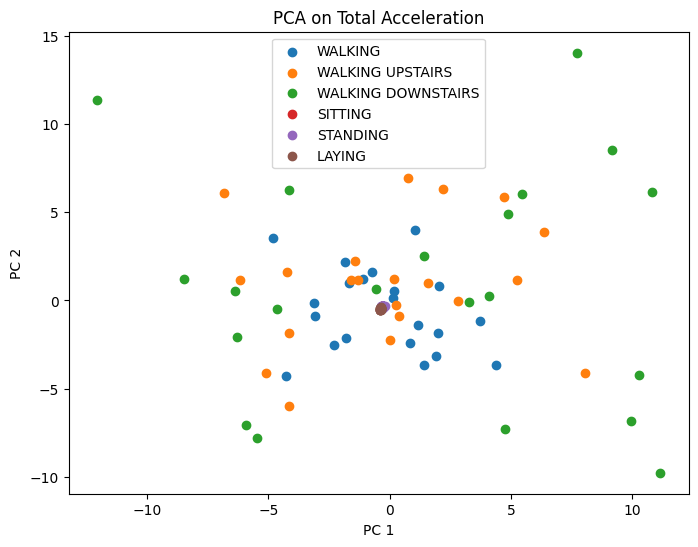

In [16]:
X_train_total_acc = np.sum(X_train**2, axis=2)
data_with_labels = np.column_stack((X_train_total_acc, y_train))

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(data_with_labels)

plt.figure(figsize=(8, 6))
for activity in np.unique(y_train):
    indices = np.where(y_train == activity)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], label=activity_labels[activity])
plt.title('PCA on Total Acceleration')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

2. Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

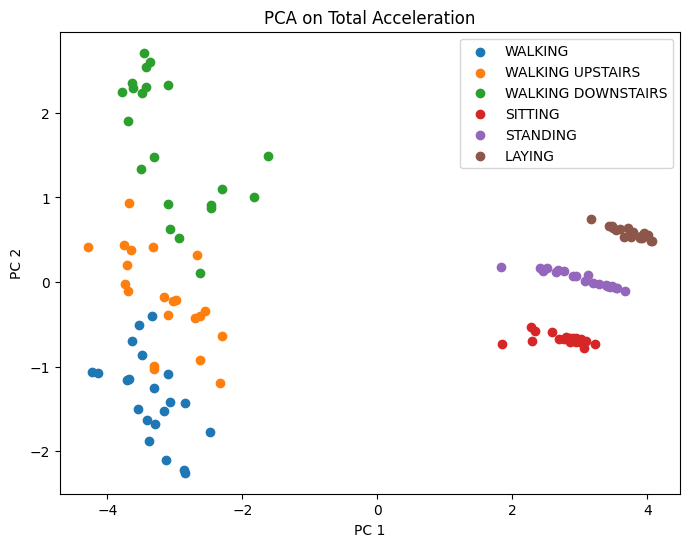

In [17]:
data_with_labels = np.column_stack((nX_train, y_train))

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(data_with_labels)

plt.figure(figsize=(8, 6))
for activity in np.unique(y_train):
    indices = np.where(y_train == activity)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], label=activity_labels[activity])
plt.title('PCA on Total Acceleration')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

In [44]:
X_df = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header=None, sep='\s+')
X_df_heads = pd.read_csv('UCI HAR Dataset/features.txt', header=None, sep='\s+')
X_df.columns = X_df_heads[1].values
y_df = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, sep='\s+')


3. Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

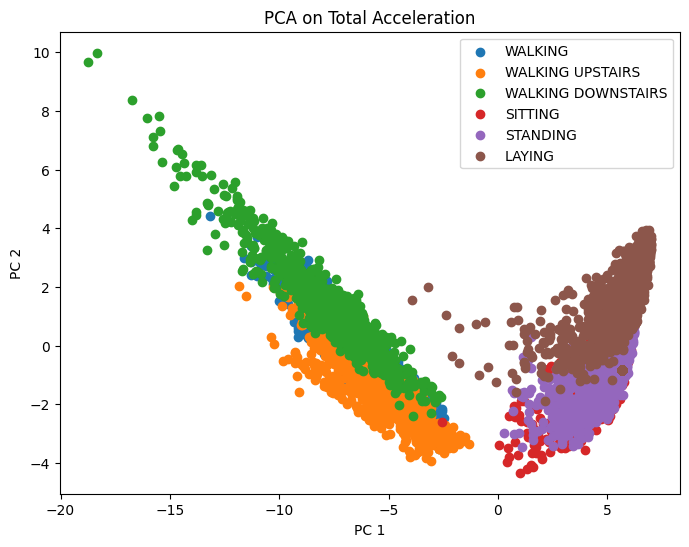

In [19]:
data_with_labels = np.column_stack((X_df, y_df))

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(data_with_labels)

plt.figure(figsize=(8, 6))
for activity in np.unique(y_df):
    indices = np.where(y_df == activity)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], label=activity_labels[activity])
plt.title('PCA on Total Acceleration')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

4. Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

For the plot of PCA on TSFEL, the partitions are clearly visible. Hence, it appears to give the best results. But the sample space of TSFEL plot is less as compared to the plot on featurised dataset.


We can say that scatter plot of TSFEL featurised data gives more clarity on the data points and there visualisation but the scatter plot on the featurised dataset also gives a good visulasation giving a snese on the overlaps in case of a vast dataset.

## Q4

Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features?

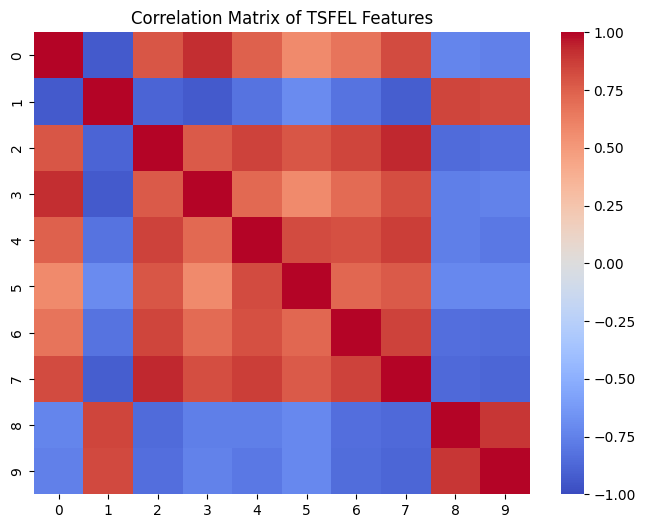

In [20]:
nX_train = pd.DataFrame(nX_train)
correlation_matrix = nX_train.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of TSFEL Features')
plt.show()

The features 8 and 9 are highly correlated and seem redundant.


Features 2-7 are also quite correlated with one another, specially in pairwise 2 and 3, 4 and 5, 6 and 7.


In total we can say that the total most significant features are 4.

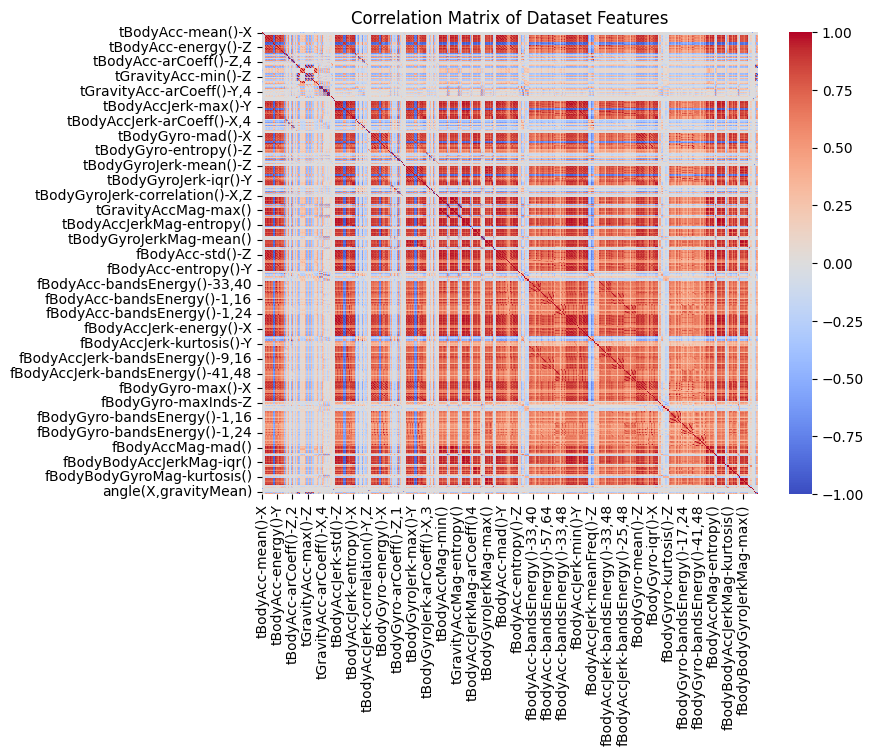

In [21]:
X_df = pd.DataFrame(X_df)
correlation_matrix = X_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Dataset Features')
plt.show()

In [22]:
selector = VarianceThreshold()
X_df_var = selector.fit_transform(X_df)

In [41]:
kbest_selector = SelectKBest(score_func=f_classif, k=150)
X_df_var_k = kbest_selector.fit_transform(X_df_var, y_df)

c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


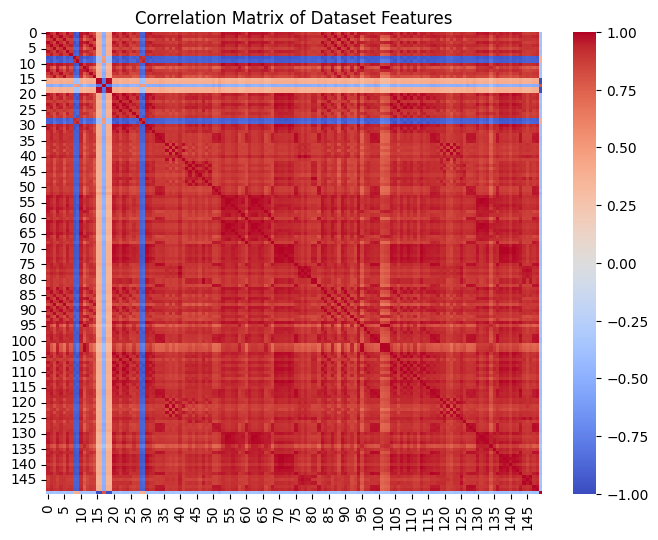

In [42]:
X_df_var_k = pd.DataFrame(X_df_var_k)
correlation_matrix = X_df_var_k.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Dataset Features')
plt.show()

The number of correlated features seems small, although small packets can be observed where the features are highly correlated and hence redundant. But nonetheless, it can be said that a high number of features are quite independent and can influence the learning significantly.